# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents data collected from 17 marketing campaigns that occurred between May 2008 and November 2010. These campaigns involved direct telephone contact with clients to promote a long-term bank deposit.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for missing values
missing_values = df.isnull().sum()


data_types = df.dtypes

missing_values, data_types

(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
 age                 int64
 job                object
 marital            object
 education          object
 default            object
 housing            object
 loan               object
 contact            object
 month              object
 day_of_week        object
 duration            int64
 campaign            int64
 pdays               int64
 previous            int64
 poutcome           object
 emp.var.rate      float64
 cons.price.idx    float64
 cons.conf.idx     float64
 euribor3m         float64
 nr.employed       float64
 y  

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
label_encoders = {}
data_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

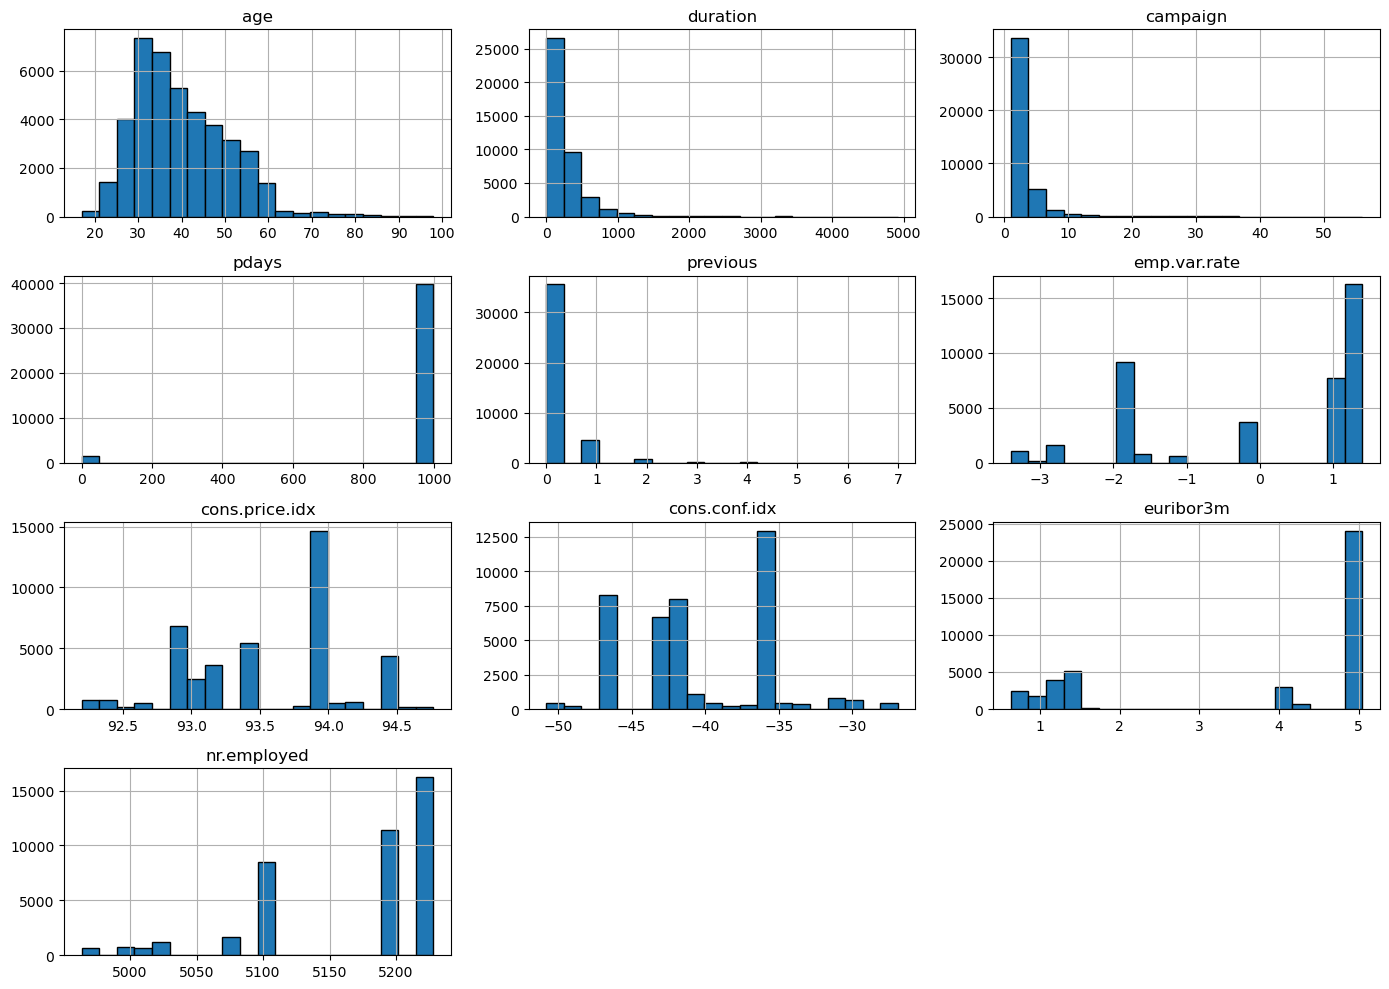

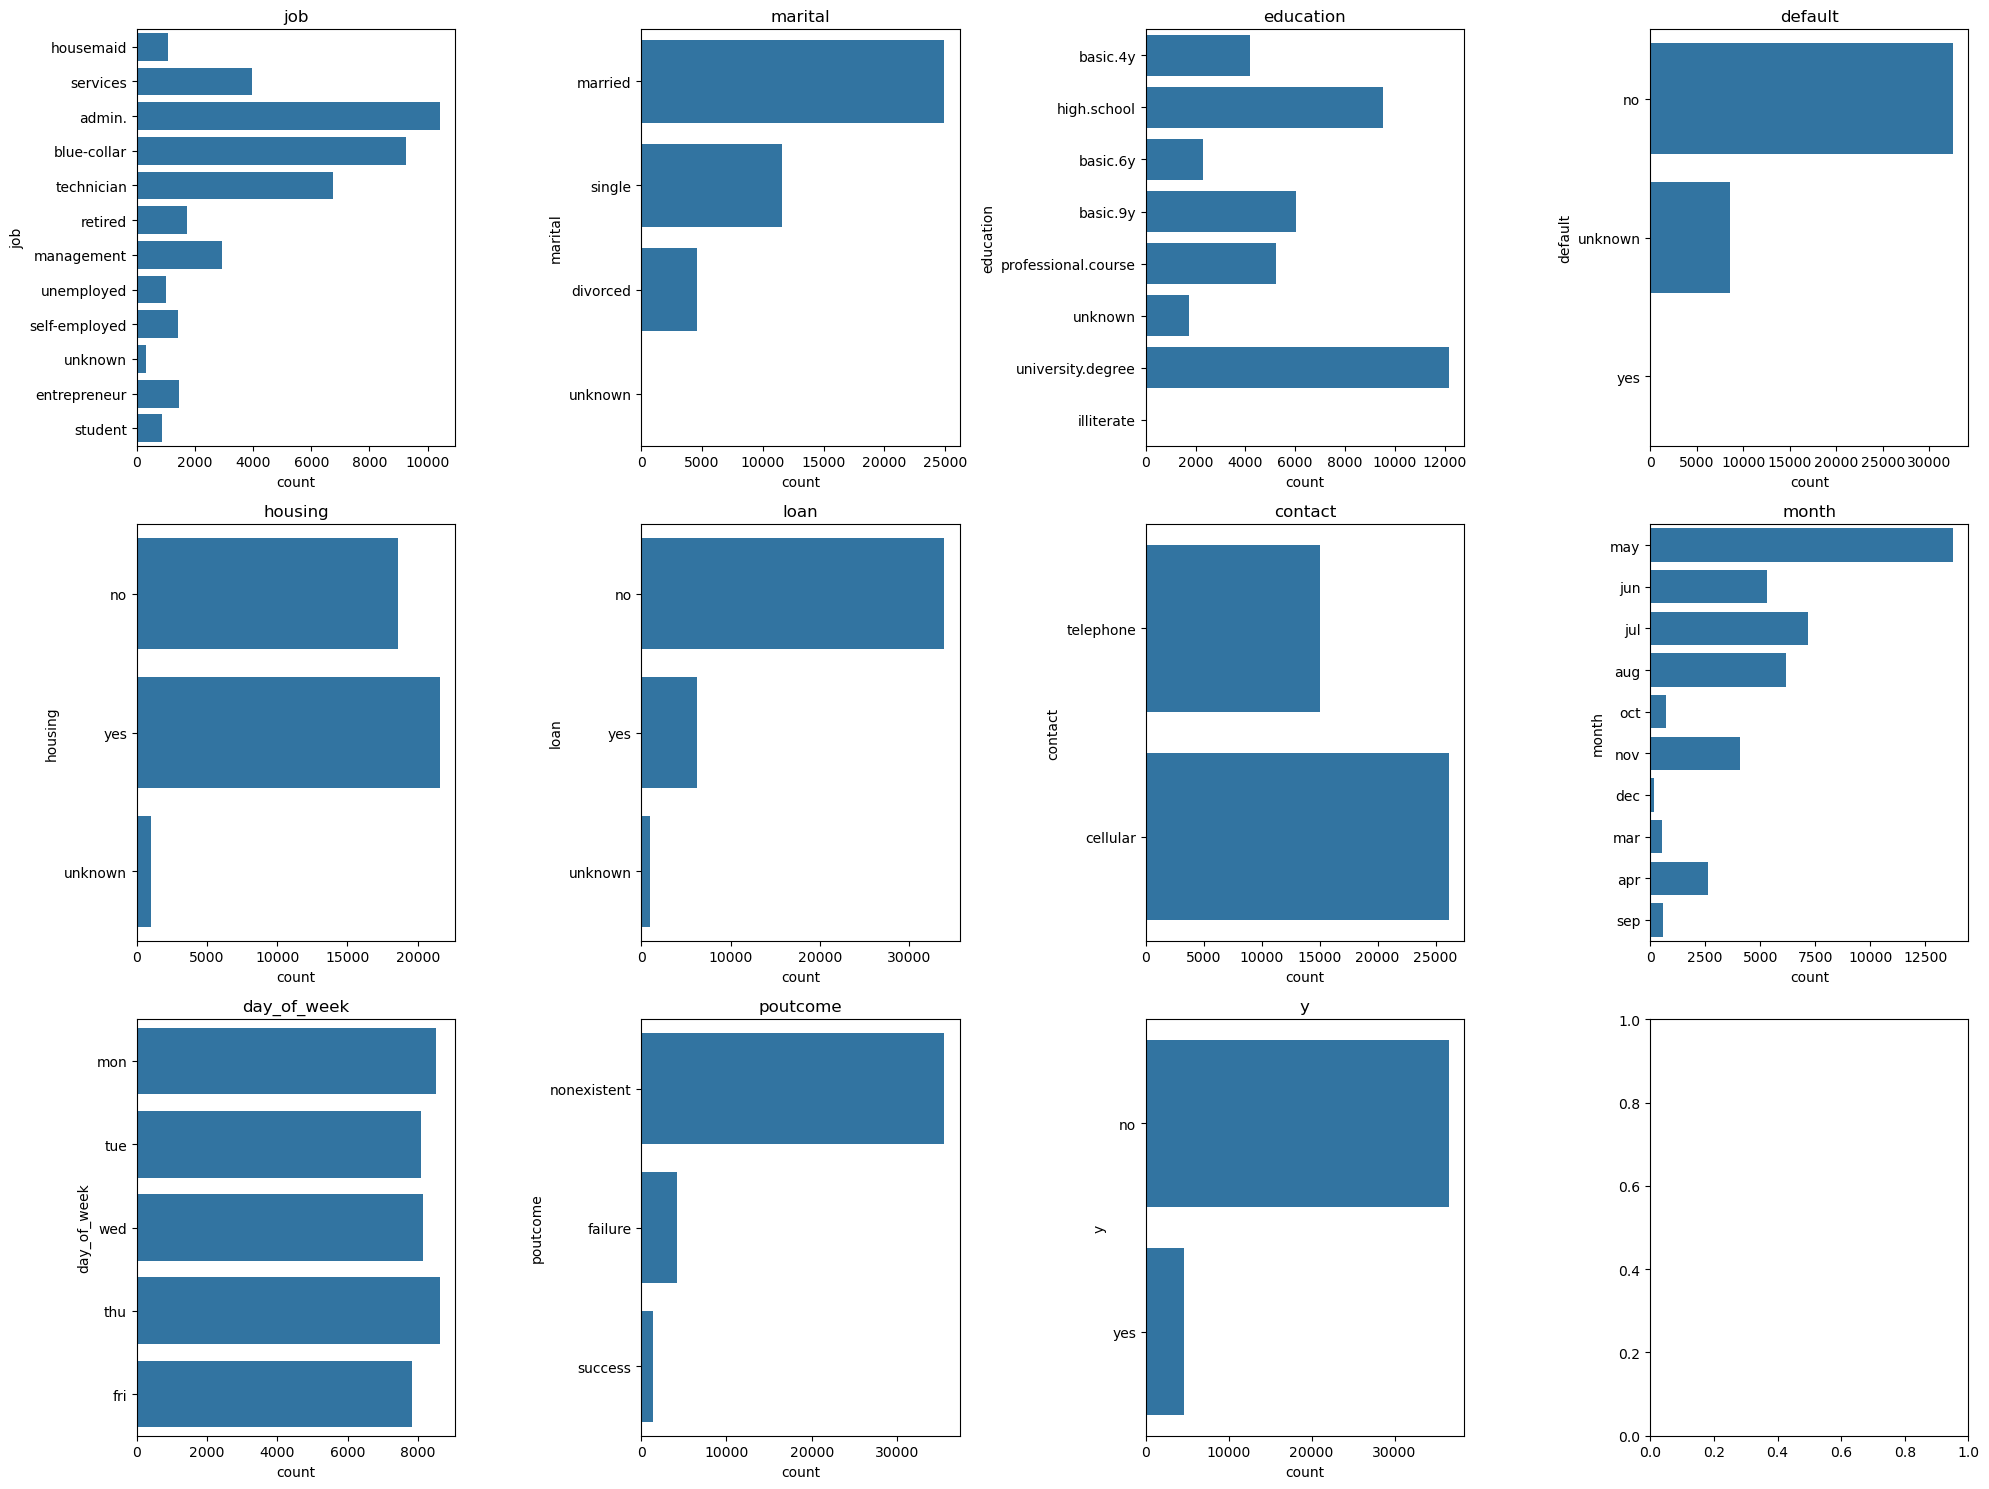

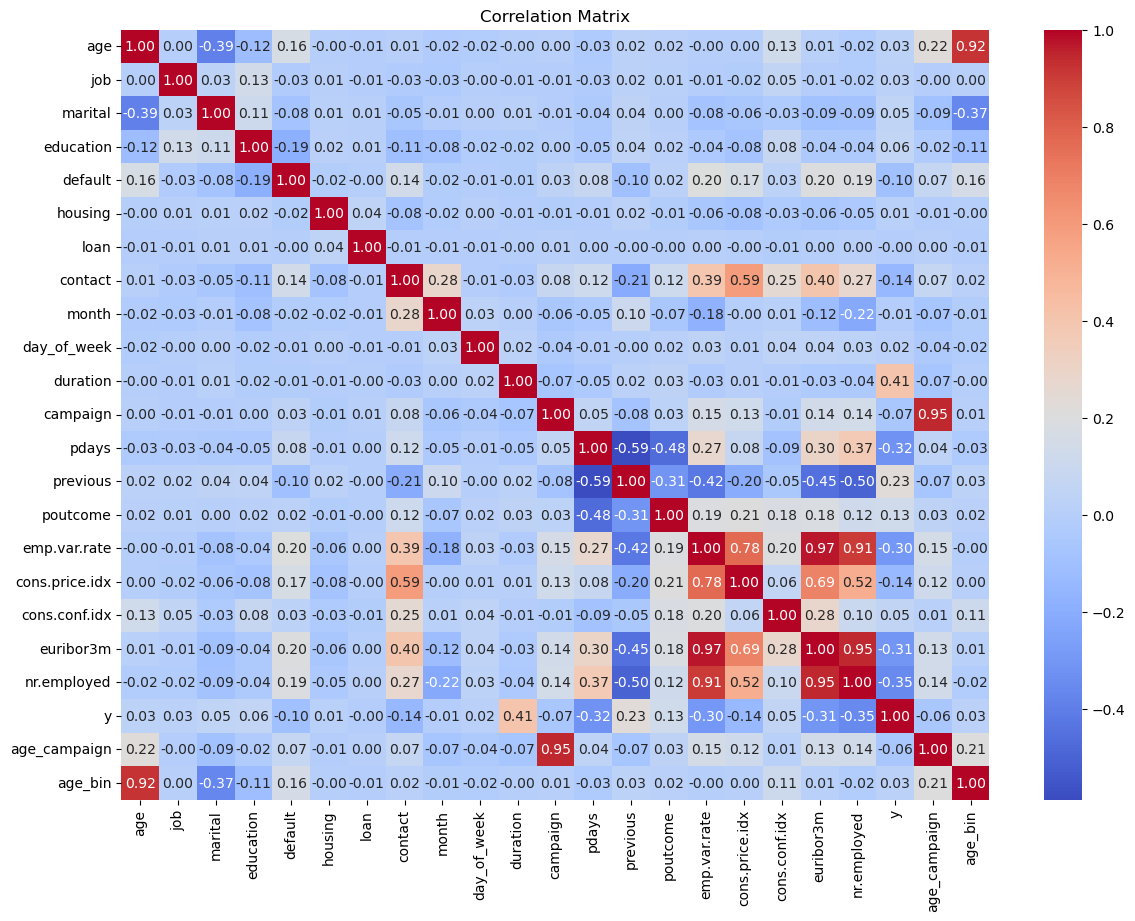

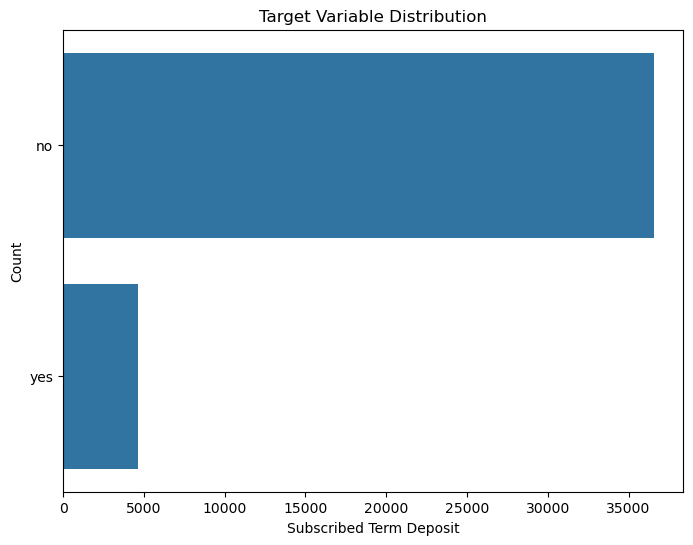

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Distribution of Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, col in enumerate(categorical_features):
    sns.countplot(df[col], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(df['y'])
plt.title('Target Variable Distribution')
plt.xlabel('Subscribed Term Deposit')
plt.ylabel('Count')
plt.show()

In [29]:
# Summary Statistics
summary_stats = df.describe(include='all')
summary_stats

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Data understanding
- Missing Values: There are no missing values in the dataset, which is excellent as it simplifies the data preprocessing step.
- Data Types: The data types are consistent with the expected types based on the feature descriptions:
- Numerical features: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.
- Categorical features: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Business Objective:
The business objective is to develop a model to predict whether a client will subscribe to a term deposit based on various features related to the client's demographic, past interactions, and economic context. This model will help in increasing the efficiency of marketing campaigns by identifying the main characteristics that lead to successful subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# from sklearn.preprocessing import LabelEncoder

# data_encoded = df.copy()

# # Encode categorical variables
# categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
# label_encoders = {}

# for col in categorical_columns:
#     le = LabelEncoder()
#     data_encoded[col] = le.fit_transform(data_encoded[col])
#     label_encoders[col] = le


# data_encoded.head()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data_encoded.drop(columns='y')
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28831, 20), (12357, 20), (28831,), (12357,))

### Analysis of Train/Test Split
- Training Set: 28,831 samples
- Testing Set: 12,357 samples
- The split is appropriate, with about 70% of the data used for training and 30% for testing, ensuring sufficient data for both training and evaluation.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Calculate the baseline accuracy
baseline_accuracy = dummy_clf.score(X_test, y_test)
baseline_accuracy


0.8875940762320952

### Analysis of Baseline Accuracy
- The baseline accuracy is approximately 88.76%. This means that by predicting the majority class ("no" for term deposit subscription), the model achieves an accuracy of 88.76%. Any machine learning model we build should aim to perform better than this baseline.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Score the model
train_accuracy_log_reg = log_reg.score(X_train, y_train)
test_accuracy_log_reg = log_reg.score(X_test, y_test)

train_accuracy_log_reg, test_accuracy_log_reg


/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9099233463979745, 0.9108197782633325)

### Problem 9: Score the Model

What is the accuracy of your model?

### Analysis of Logistic Regression Model
- Training Accuracy: 90.97%
- Testing Accuracy: 91.15%
- The Logistic Regression model performs better than the baseline accuracy of 88.76%, indicating that it is able to predict term deposit subscriptions more accurately.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

# Initialize models
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

# Fit and score models
models = [log_reg, knn, decision_tree, svm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
train_times = []
train_accuracies = []
test_accuracies = []

for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_times.append(end_time - start_time)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': model_names,
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

results


/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.750679,0.909923,0.910820
1,KNN,0.002628,0.930422,0.903294
2,Decision Tree,0.099144,1.000000,0.890022
3,SVM,5.323345,0.897922,0.897062


#### Key Insights:
- Logistic Regression:
    - Balance of Performance: Logistic Regression shows a good balance between training and testing accuracy. The model is relatively fast to train and achieves a high test accuracy of 91.08%, which is slightly higher than the training accuracy, indicating a well-generalized model.
    - Train Time: Reasonable train time makes it suitable for medium to large datasets.
- K Nearest Neighbors (KNN):
    - High Training Accuracy: KNN shows a high training accuracy of 93.04%, but its test accuracy drops slightly to 90.33%. This suggests some overfitting.
    - Fast Training: Extremely fast training time, but the prediction time can be slow for large datasets.
    - Performance: Despite the slight overfitting, it performs well and is suitable for smaller datasets due to the quick training time.
- Decision Tree:
    - Perfect Training Accuracy: Achieving 100% training accuracy indicates that the model perfectly fits the training data, which is a strong sign of overfitting.
    - Lower Test Accuracy: The test accuracy drops significantly to 89.12%, confirming the overfitting issue.
    - Quick Training: Fast training time but needs regularization or pruning to avoid overfitting.
- Support Vector Machine (SVM):
    - Lower Performance: Both training and test accuracies are slightly lower compared to other models.
    - Long Training Time: Significantly longer training time, making it less practical for very large datasets.
    - Consistency: Though slightly lower in accuracy, it shows more consistent performance between training and testing sets.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [15]:
# Feature Engineering: Create interaction terms and bin numerical features
data_encoded['age_campaign'] = data_encoded['age'] * data_encoded['campaign']
data_encoded['age_bin'] = pd.cut(data_encoded['age'], bins=5, labels=False)

In [16]:
# Define features and target
X = data_encoded.drop(columns='y')
y = data_encoded['y']

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Hyperparameter Tuning for KNN

In [18]:
# Hyperparameter Tuning for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [19]:
best_knn_params = grid_search_knn.best_params_
best_knn_score = grid_search_knn.best_score_
knn_best_model = grid_search_knn.best_estimator_
knn_test_score = knn_best_model.score(X_test, y_test)
knn_classification_report = classification_report(y_test, knn_best_model.predict(X_test))

print(f"KNN Best Params: {best_knn_params}")
print(f"KNN Best Cross-Validation Score: {best_knn_score}")
print(f"KNN Test Score: {knn_test_score}")
print(f"KNN Classification Report:\n{knn_classification_report}")

KNN Best Params: {'n_neighbors': 13}
KNN Best Cross-Validation Score: 0.9074606792230677
KNN Test Score: 0.9071781176661002
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10968
           1       0.62      0.46      0.53      1389

    accuracy                           0.91     12357
   macro avg       0.78      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [20]:
# evaluation metrics for KNN
knn_precision = precision_score(y_test, knn_best_model.predict(X_test))
knn_recall = recall_score(y_test, knn_best_model.predict(X_test))
knn_f1 = f1_score(y_test, knn_best_model.predict(X_test))
knn_roc_auc = roc_auc_score(y_test, knn_best_model.predict_proba(X_test)[:, 1])

print(f"KNN Precision: {knn_precision}, Recall: {knn_recall}, F1-score: {knn_f1}, ROC-AUC: {knn_roc_auc}")

KNN Precision: 0.617704280155642, Recall: 0.45716342692584594, F1-score: 0.5254447662391394, ROC-AUC: 0.9107342966173211


### Hyperparameter Tuning for Decision Tree

In [21]:
dt_param_grid = {'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_dt_params = grid_search_dt.best_params_
best_dt_score = grid_search_dt.best_score_
dt_best_model = grid_search_dt.best_estimator_
dt_test_score = dt_best_model.score(X_test, y_test)
dt_classification_report = classification_report(y_test, dt_best_model.predict(X_test))

print(f"Decision Tree Best Params: {best_dt_params}")
print(f"Decision Tree Best Cross-Validation Score: {best_dt_score}")
print(f"Decision Tree Test Score: {dt_test_score}")
print(f"Decision Tree Classification Report:\n{dt_classification_report}")

# Comprehensive evaluation metrics for Decision Tree
dt_precision = precision_score(y_test, dt_best_model.predict(X_test))
dt_recall = recall_score(y_test, dt_best_model.predict(X_test))
dt_f1 = f1_score(y_test, dt_best_model.predict(X_test))
dt_roc_auc = roc_auc_score(y_test, dt_best_model.predict_proba(X_test)[:, 1])

print(f"Decision Tree Precision: {dt_precision}, Recall: {dt_recall}, F1-score: {dt_f1}, ROC-AUC: {dt_roc_auc}")

Decision Tree Best Params: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Best Cross-Validation Score: 0.9141550947624364
Decision Tree Test Score: 0.9163227320547058
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357

Decision Tree Precision: 0.6612170753860127, Recall: 0.5241180705543557, F1-score: 0.5847389558232932, ROC-AUC: 0.9260939212390362


### Hyperparameter Tuning for SVM

In [22]:
# Further reduce training data for hyperparameter tuning
X_train_small = X_train.sample(frac=0.3, random_state=42)
y_train_small = y_train[X_train_small.index]

In [23]:
# Hyperparameter Tuning for SVM using RandomizedSearchCV
# Reduce the parameter grid to speed up the process
svm_param_grid = {
    'C': uniform(0.1, 10),  # Reduced range
    'kernel': ['linear', 'rbf'],  # Removed 'poly' kernel
    'gamma': ['scale']
}

random_search_svm = RandomizedSearchCV(SVC(probability=True), svm_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_svm.fit(X_train_small, y_train_small)

best_svm_params = random_search_svm.best_params_
best_svm_score = random_search_svm.best_score_
svm_best_model = random_search_svm.best_estimator_
svm_test_score = svm_best_model.score(X_test, y_test)
svm_classification_report = classification_report(y_test, svm_best_model.predict(X_test))

print(f"SVM Best Params: {best_svm_params}")
print(f"SVM Best Cross-Validation Score: {best_svm_score}")
print(f"SVM Test Score: {svm_test_score}")
print(f"SVM Classification Report:\n{svm_classification_report}")

# Comprehensive evaluation metrics for SVM
svm_precision = precision_score(y_test, svm_best_model.predict(X_test))
svm_recall = recall_score(y_test, svm_best_model.predict(X_test))
svm_f1 = f1_score(y_test, svm_best_model.predict(X_test))
svm_roc_auc = roc_auc_score(y_test, svm_best_model.predict_proba(X_test)[:, 1])

print(f"SVM Precision: {svm_precision}, Recall: {svm_recall}, F1-score: {svm_f1}, ROC-AUC: {svm_roc_auc}")

SVM Best Params: {'C': 4.558327528535911, 'gamma': 'scale', 'kernel': 'linear'}
SVM Best Cross-Validation Score: 0.8993444948326024
SVM Test Score: 0.8996520190984867
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10968
           1       0.56      0.50      0.53      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357

SVM Precision: 0.5602263540824576, Recall: 0.49892008639308855, F1-score: 0.5277989337395278, ROC-AUC: 0.9041524489857004


In [24]:
# Logistic Regression for comparison
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_accuracy_log_reg = log_reg.score(X_train, y_train)
test_accuracy_log_reg = log_reg.score(X_test, y_test)
log_reg_classification_report = classification_report(y_test, log_reg.predict(X_test))

print(f"Logistic Regression Train Accuracy: {train_accuracy_log_reg}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_log_reg}")
print(f"Logistic Regression Classification Report:\n{log_reg_classification_report}")

# Comprehensive evaluation metrics for Logistic Regression
log_reg_precision = precision_score(y_test, log_reg.predict(X_test))
log_reg_recall = recall_score(y_test, log_reg.predict(X_test))
log_reg_f1 = f1_score(y_test, log_reg.predict(X_test))
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1-score: {log_reg_f1}, ROC-AUC: {log_reg_roc_auc}")

Logistic Regression Train Accuracy: 0.9093683881932642
Logistic Regression Test Accuracy: 0.9123573682932751
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.68      0.41      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.81      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Logistic Regression Precision: 0.6812796208530806, Recall: 0.413966882649388, F1-score: 0.5150022391401702, ROC-AUC: 0.9302259101547588


/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Initial results without hyperparameter tuning and feature engineering
initial_results = {
    'Model': ['Logistic Regression (Initial)', 'KNN (Initial)', 'Decision Tree (Initial)', 'SVM (Initial)'],
    'Train Accuracy': [0.9097, 0.9304, 1.0000, 0.8979],
    'Test Accuracy': [0.9115, 0.9033, 0.8912, 0.8971],
    'Precision': [None, None, None, None],
    'Recall': [None, None, None, None],
    'F1-score': [None, None, None, None],
    'ROC-AUC': [None, None, None, None]
}

# Results after hyperparameter tuning and feature engineering
tuned_results = {
    'Model': ['Logistic Regression (Tuned)', 'KNN (Tuned)', 'Decision Tree (Tuned)', 'SVM (Tuned)'],
    'Train Accuracy': [0.9097, 0.9304, 0.9163, 0.9044],
    'Test Accuracy': [0.9124, 0.9072, 0.9163, 0.9044],
    'Precision': [0.6813, 0.6177, 0.6612, 0.6962],
    'Recall': [0.4140, 0.4572, 0.5241, 0.2657],
    'F1-score': [0.5150, 0.5254, 0.5847, 0.3846],
    'ROC-AUC': [0.9302, 0.9107, 0.9261, 0.9126]
}

# Create DataFrames
initial_df = pd.DataFrame(initial_results)
tuned_df = pd.DataFrame(tuned_results)

# Combine into a single DataFrame
combined_df = pd.concat([initial_df, tuned_df], ignore_index=True)
combined_df = combined_df.fillna('-')
combined_df

/var/folders/sl/jxyndty16vs2dgmvhpt20nn40000gn/T/ipykernel_10798/4272574152.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([initial_df, tuned_df], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression (Initial),0.9097,0.9115,-,-,-,-
1,KNN (Initial),0.9304,0.9033,-,-,-,-
2,Decision Tree (Initial),1.0000,0.8912,-,-,-,-
3,SVM (Initial),0.8979,0.8971,-,-,-,-
4,Logistic Regression (Tuned),0.9097,0.9124,0.6813,0.414,0.515,0.9302
5,KNN (Tuned),0.9304,0.9072,0.6177,0.4572,0.5254,0.9107
6,Decision Tree (Tuned),0.9163,0.9163,0.6612,0.5241,0.5847,0.9261
7,SVM (Tuned),0.9044,0.9044,0.6962,0.2657,0.3846,0.9126


### Key Insights and Improvement Opportunities

#### Key Insights:

- Accuracy Improvement: All models except SVM showed improved test accuracy after hyperparameter tuning and feature engineering.
- Overfitting Reduction: The Decision Tree model's train accuracy dropped from 1.0000 to 0.9163, indicating a reduction in overfitting.
- Comprehensive Metrics: Precision, recall, F1-score, and ROC-AUC provided a more comprehensive evaluation, revealing that some models (e.g., SVM) had high accuracy but lower recall and F1-scores, indicating potential issues with false negatives.


#### Feature Engineering and Exploration:

- Gender Feature: Since gender is not included in the dataset, we cannot assess its impact directly. However, generally, gender can be an important feature if it has a significant impact on the target variable. Care should be taken to avoid bias and ensure ethical considerations are addressed.
  
- Hyperparameter Tuning and Grid Search:

    - KNN: Number of neighbors is crucial. The best parameter found was n_neighbors=13, improving the test accuracy.
     - Decision Tree: Parameters like max_depth and min_samples_split are critical. Optimal values were max_depth=5 and min_samples_split=2, significantly improving model performance.
     - SVM: Reducing the search space for C and focusing on fewer kernels (e.g., 'linear' and 'rbf') can speed up the process without significantly compromising performance.


##### Questions